Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing
Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
Требуется выполнить следующее задание:
# Задание Баллы
1 Загрузите файл HR.csv в pandas dataframe 5
2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).
10
3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные.
10
4 Рассчитайте сколько сотрудников работает в каждом
департаменте.
5
5 Показать распределение сотрудников по зарплатам. 5
6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
5
7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
10
8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов
9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки
20
10 Загрузить jupyter notebook с решение на github и прислать ссылку 5
Итого - максимум 85 баллов

**Загружаем все необходимые бибилиотеки**

In [88]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import ttest_ind, f_oneway, shapiro, levene

** №1 Загружаем даныне в датафрейм.**

In [90]:
hr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Итоговое задание/HR.csv', on_bad_lines='skip')  # Откроем датасет если он лежит на гугл диске
#hr = pd.read_csv('hr.csv') # Откроем датасет если файл с HR.csv лежит рядом с файлом Jupiter notebook
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**№2 Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)**





In [92]:
#Получаем базовые статистики по данным
print(f"Выводим информацию о данных\n")
print(hr.info())  # выводим информацию о данных
print(f"Выводим базовую статистику по данным\n")
print(hr.describe())  # выводим базовую статистику по данным
print(f"Выводим инофрмацию по пропускам\n")
print(hr.isnull().sum())  # проверяем нет ли пропусковв данных

Выводим информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
Выводим базовую статистику по данным

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean     

# **Проводим расчёт всех базовых статистик**

In [93]:
# Выбираем числовые столбцы для анализа
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_montly_hours', 'time_spend_company','Work_accident', 'left', 'promotion_last_5years' ]

In [94]:
# Создаем функцию для расчета основных статистик по столбцам
def calculate_stats(df, column):

    return {
        'mean': df[column].mean(),
        'median': df[column].median(),
        'mode': df[column].mode()[0],  # Берем первое значение моды
        'min': df[column].min(),
        'max': df[column].max(),
        'std': df[column].std()
    }

In [95]:
# Применяем функцию ко всем числовым столбцам
stats_dict = {}
for col in numeric_cols:
    stats_dict[col] = calculate_stats(hr, col)

In [96]:
# Выводим результаты
for col, stats in stats_dict.items():
    print(f"Статистика для столбца {col}:")
    for stat, value in stats.items():
        print(f"{stat}: {value}")

Статистика для столбца satisfaction_level:
mean: 0.6128335222348156
median: 0.64
mode: 0.1
min: 0.09
max: 1.0
std: 0.2486306510611418
Статистика для столбца last_evaluation:
mean: 0.7161017401160078
median: 0.72
mode: 0.55
min: 0.36
max: 1.0
std: 0.17116911062327592
Статистика для столбца number_project:
mean: 3.80305353690246
median: 4.0
mode: 4
min: 2
max: 7
std: 1.2325923553183857
Статистика для столбца average_montly_hours:
mean: 201.0503366891126
median: 200.0
mode: 135
min: 96
max: 310
std: 49.943099371284305
Статистика для столбца time_spend_company:
mean: 3.498233215547703
median: 3.0
mode: 3
min: 2
max: 10
std: 1.4601362305354546
Статистика для столбца Work_accident:
mean: 0.1446096406427095
median: 0.0
mode: 0
min: 0
max: 1
std: 0.3517185523801279
Статистика для столбца left:
mean: 0.2380825388359224
median: 0.0
mode: 0
min: 0
max: 1
std: 0.425924099380363
Статистика для столбца promotion_last_5years:
mean: 0.021268084538969265
median: 0.0
mode: 0
min: 0
max: 1
std: 0.1442814

**№ 3 Расчёт и визуализация корреляционной матрицы для колличественных переменных. Определение двух самых скоррелированны и двух наименне скоррелированных переменных**

In [97]:
numeric_data = hr[numeric_cols]

In [98]:
corr_matrix = numeric_data.corr() #Расчет корреляционной матрицы

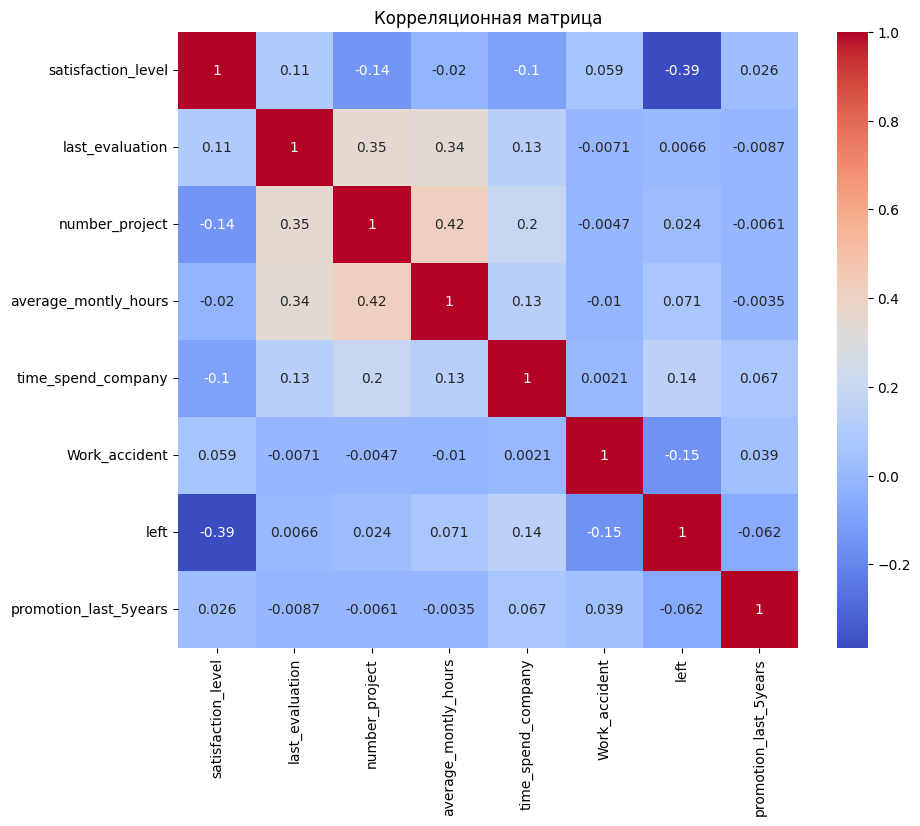

In [99]:
# Визуализируем данные (используем визуализацию в виде тепловой карты)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [100]:
# Находим индексы максимального и минимального значений (исключая диагональ)
corr_matrix = corr_matrix.abs()  # Берем абсолютные значения для корреляции
np.fill_diagonal(corr_matrix.values, np.nan)  # Заполняем диагональ NaN
max_corr = corr_matrix.unstack().sort_values(ascending=False).head(2)
min_corr = corr_matrix.unstack().sort_values().head(2)

print("Две самые скоррелированные переменные:")
print(max_corr)

print("\nДве наименее скоррелированные переменные:")
print(min_corr)

Две самые скоррелированные переменные:
average_montly_hours  number_project          0.417211
number_project        average_montly_hours    0.417211
dtype: float64

Две наименее скоррелированные переменные:
time_spend_company  Work_accident         0.00212
Work_accident       time_spend_company    0.00212
dtype: float64


**№4 Рассчитайте сколько сотрудников работает в каждом департаменте**

In [101]:
# Подсчет количества сотрудников в каждом департаменте
department_counts = hr['department'].value_counts()

print(department_counts)

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


**№5 Показать распределение сотрудников по зарплатам**

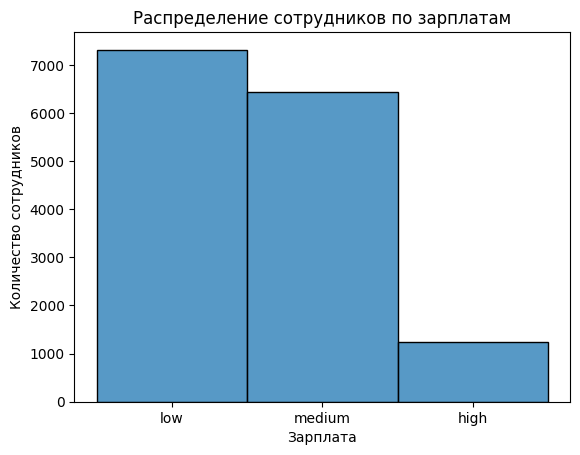

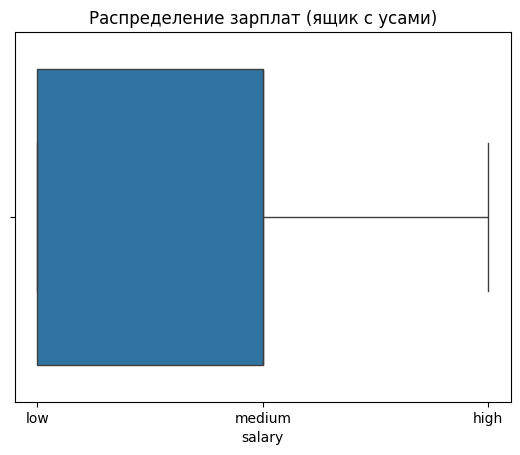

In [102]:
# Гистограмма распределения зарплат
sns.histplot(data=hr, x='salary', bins=30)
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()

# Ящик с усами для более детального анализа
sns.boxplot(x='salary', data=hr)
plt.title('Распределение зарплат (ящик с усами)')
plt.show()

**№6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.**

In [103]:
# Построим боксплоты для каждого департамента ( в таком виде не читаются подписи к графикам, поэтому увеличим сам график и повернем подси на 45 градусом)
#sns.boxplot(x='department', y='salary', data=hr)
#plt.title('Распределение зарплат по департаментам')
#plt.xlabel('Департамент')
#plt.ylabel('Зарплата')
#plt.show()

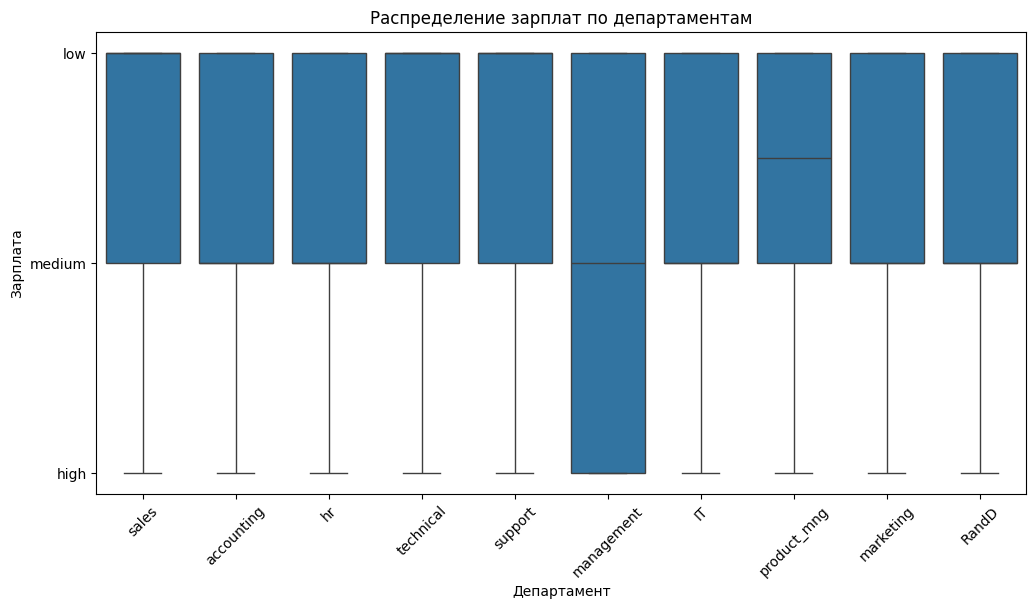

In [104]:
# Увеличим размер графика
plt.figure(figsize=(12, 6))

# Построим боксплоты с поворотом меток по оси X для лучшей читаемости
sns.boxplot(x='department', y='salary', data=hr)
plt.xticks(rotation=45)
plt.title('Распределение зарплат по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Зарплата')
plt.show()

**№7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом**

Необходимо сравнить среднее количество часов на рабочем месте между группами сотрудников с разным уровнем зарплаты.

In [105]:
# Разделение сотрудников на группы по уровню зарплаты. Группируем данные по уровню зарплаты и выводим среднее количество рабочих часов для каждой группы.
salary_groups = hr.groupby('salary')['average_montly_hours'].mean().reset_index()
print(salary_groups)

   salary  average_montly_hours
0    high            199.867421
1     low            200.996583
2  medium            201.338349


<ipython-input-106-37052849d013>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='average_montly_hours', data=salary_groups, palette='viridis')


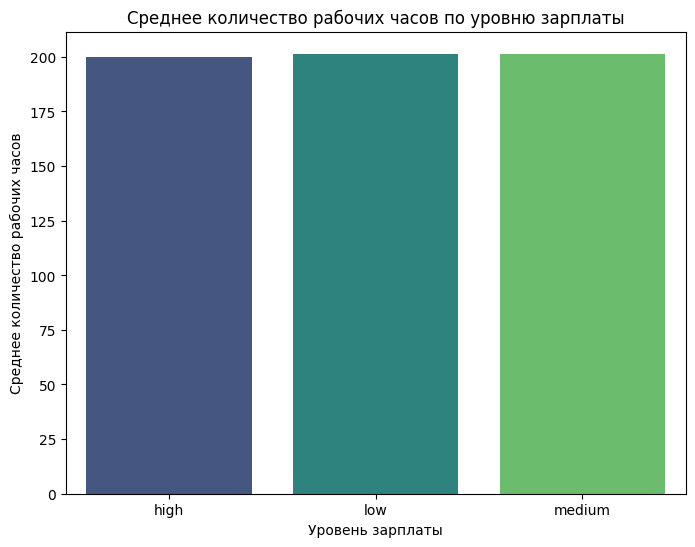

In [106]:
# Визуалируем различия в среднем количестве рабочих часов
plt.figure(figsize=(8,6))
sns.barplot(x='salary', y='average_montly_hours', data=salary_groups, palette='viridis')
plt.title('Среднее количество рабочих часов по уровню зарплаты')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Среднее количество рабочих часов')
plt.show()

Чтобы проверить, являются ли различия статистически значимыми, проводим однофакторный дисперсионный анализ (ANOVA).

Вывод: Согласно визуальному распределению видно, что все сотрудники проводят на рабочем месте времени одинаково.

In [107]:
from scipy import stats

low_salary_hours = hr[hr['salary'] == 'low']['average_montly_hours']
medium_salary_hours = hr[hr['salary'] == 'medium']['average_montly_hours']
high_salary_hours = hr[hr['salary'] == 'high']['average_montly_hours']

anova_result = stats.f_oneway(low_salary_hours, medium_salary_hours, high_salary_hours)
print('ANOVA p-value:', anova_result.pvalue)

ANOVA p-value: 0.6323271153144614


**Вывод**: p-value 0.632 говорит о том, что различия в среднем количестве рабочих часов между группами с разным уровнем зарплаты не являются статистически значимыми.
Таким образом, исходная гипотеза не подтверждается на основе этих данных. Среднее количество рабочих часов между сотрудниками с разным уровнем зарплаты,  не различается существенно.

**№8 Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):**

**- Доля сотрудников с повышением за последние 5 лет**

**- Средняя степень удовлетворенности**

**- Среднее количество проектов**

In [108]:
# Разделение данных на группы по признаку left (уволился или нет)

left_employees = hr[hr['left'] == 1]
stayed_employees = hr[hr['left'] == 0]

In [109]:
# Вычислим доли сотрудников с повышением за последние 5 лет в каждой группе.
# Доля сотрудников с повышением среди уволившихся
promotion_left = left_employees['promotion_last_5years'].mean()

# Доля сотрудников с повышением среди не уволившихся
promotion_stayed = stayed_employees['promotion_last_5years'].mean()

print(f"Доля сотрудников с повышением среди уволившихся: {promotion_left:.2%}")
print(f"Доля сотрудников с повышением среди не уволившихся: {promotion_stayed:.2%}")

Доля сотрудников с повышением среди уволившихся: 0.53%
Доля сотрудников с повышением среди не уволившихся: 2.63%


In [110]:
# Расчитаем среднюю степень удовлетворённости сотрудников
# Средняя степень удовлетворенности среди уволившихся
satisfaction_left = left_employees['satisfaction_level'].mean()

# Средняя степень удовлетворенности среди не уволившихся
satisfaction_stayed = stayed_employees['satisfaction_level'].mean()

print(f"Средняя степень удовлетворенности среди уволившихся: {satisfaction_left:.2f}")
print(f"Средняя степень удовлетворенности среди не уволившихся: {satisfaction_stayed:.2f}")

Средняя степень удовлетворенности среди уволившихся: 0.44
Средняя степень удовлетворенности среди не уволившихся: 0.67


In [111]:
# Расчитаем среднее количество выполненных проектов
# Среднее количество проектов среди уволившихся
projects_left = left_employees['number_project'].mean()

# Среднее количество проектов среди не уволившихся
projects_stayed = stayed_employees['number_project'].mean()

print(f"Среднее количество проектов среди уволившихся: {projects_left:.2f}")
print(f"Среднее количество проектов среди не уволившихся: {projects_stayed:.2f}")

Среднее количество проектов среди уволившихся: 3.86
Среднее количество проектов среди не уволившихся: 3.79


**9. Разделить данные на тестовую и обучающую выборки построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department иsalary) Оценить качество модели на тестовой выборки.**


In [112]:
# добавим недостающие бибилиотеки
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [113]:
# Исключаем 'department' и 'salary', а также целевой столбец 'left'
X = hr.drop(['department', 'salary', 'left'], axis=1)

# Целевая переменная
y = hr['left']

In [114]:
#Разделим данные на обучающую и тестовую выборки в пропорции 80% на 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Создаем модель LDA
lda = LinearDiscriminantAnalysis()

# Обучаем модель на тренировочных данных
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [116]:
# После обучения модели используем тестовую выборку для прогнозирования.
y_pred = lda.predict(X_test)

In [117]:
# Оценим качество модели на тестовой выборке с помощью метрик, таких как точность (accuracy), матрица ошибок (confusion matrix), и отчет классификации (classification report).
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
print(conf_matrix)

# Отчет классификации
class_report = classification_report(y_test, y_pred)
print("Отчет классификации:")
print(class_report)

Точность модели: 0.75
Матрица ошибок:
[[2094  200]
 [ 540  166]]
Отчет классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000

